<a href="https://colab.research.google.com/github/renaldfredy/ANN/blob/main/ANN_ML_Individu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Renaldy Fredyan

NIM: 2301979081


This project is dedicated to fulfill an individual assignment **"ANN and Its Application in Prediction"** in a Machine Learning class with a lecturer 
Dr. Ir. Haryono Soeparno, M.Sc.

I realize that this project is still far from perfect, therefore I humbly ask for your criticism and suggestions.

Thank you for your attention and kindness.

#Library

First of all, this program need several library to help author making simple to writing program code without additional function.

Disclaimer: This program is built on `Python` programming language and use `Keras` as a API of `Tensorflow` backend of mechine learning library.

In [1]:
import numpy as np #the fundamental package for scientific computing in Python
import pandas as pd #a software library written for the Python programming language for data manipulation and analysis
import matplotlib.pyplot as plt #a plotting library for the Python programming language and its numerical mathematics extension NumPy
%matplotlib inline 
#to enable the inline plotting
from sklearn.preprocessing import MinMaxScaler #subtracts the minimum value in the feature and then divides by the range.
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator #to automatically transform both univariate and multivariate time series data into samples, ready to train deep learning models
from tensorflow import keras #a deep learning API written in Python, running on top of the machine learning platform TensorFlow.
from keras.initializers import RandomNormal #generates a sample of numbers drawn from the normal distribution, otherwise called the Gaussian distribution.
from keras.models import Sequential #a linear stack of layers
from keras.layers import Dense #a neural network layer that is connected deeply
from keras.callbacks import EarlyStopping #a form of regularization used to avoid overfitting when training a learner with an iterative method
import warnings #an advance notice of something that will happen, often something unpleasant or dangerous
warnings.filterwarnings("ignore")
import keras.backend as K
from keras.layers import Flatten

#Setting Random Value

After that, setting random seed to give innitial random number. This code is necessesary to avoid changing result of prediction when programmer try to run the program in the future.

In [2]:
seed_value= 0

# Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

# Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
np.random.seed(1)

# Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)

print(tf.random.uniform([1]).numpy())

[0.29197514]


#Data Preprocessing

##Importing the dataset

Before this explanation is going to so far, import data is needed as a dataset in this program. It is given by the individual assignment. To make it easy author write those data in csv.

In [3]:
df = pd.read_csv('/content/sales _of_mobile_phones.csv')
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df

,Units
Month,
2019-01-01,205
2019-02-01,196
2019-03-01,141
2019-04-01,112
2019-05-01,163
2019-06-01,242
2019-07-01,816
2019-08-01,1043
2019-09-01,950


##Plot Dataset

After importing data, it can be plotting to see visualization of data.

No handles with labels found to put in legend.


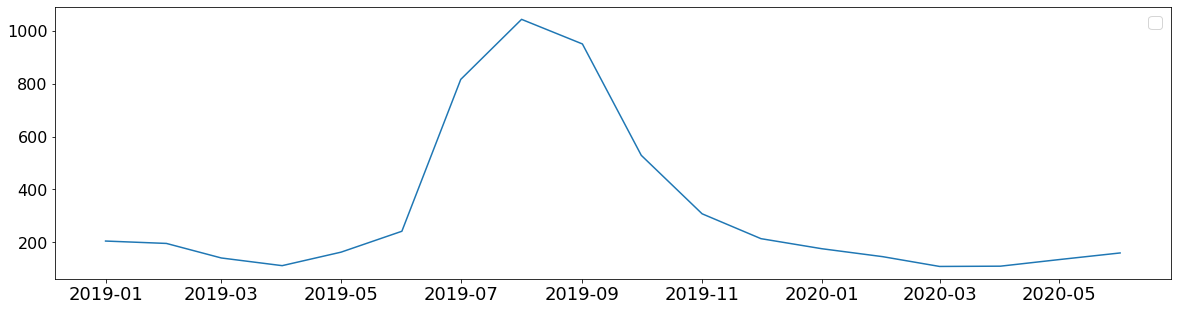

In [4]:
plt.figure(figsize=(20, 5))
plt.plot(df.index, df['Units'])
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [5]:
train = df

##Feature Scaling

Based on question
b. Perform data normalization (data transformation) from the sales results to the form of data to be processed by ANN in accordance with the binary sigmoid activation function. Use transformation, `f (x) = 0.8 ((x - min) / (max - min)) + 0.1`;

Author scale the data using library `MinMaxScaler` but this library only use general Normalization, while in that question given by function that alread modify, so author make to comprimise using code in lines 3 below:

In [6]:
scaler = MinMaxScaler()
scaler.fit(train)
train = ((0.8*(scaler.transform(train)))+0.1)
train
# len(train)

array([[0.18222698],
       [0.1745182 ],
       [0.12740899],
       [0.10256959],
       [0.14625268],
       [0.21391863],
       [0.70556745],
       [0.9       ],
       [0.82034261],
       [0.45974304],
       [0.27044968],
       [0.18993576],
       [0.15738758],
       [0.13169165],
       [0.1       ],
       [0.10085653],
       [0.12226981],
       [0.14368308]])

Now this ANN will be performing supervised machine learning, so it needs to create a labelled training set.   Those training data will have inputs and expected output labels for those inputs.   Treating this as a regression problem, this ANN will learn to associate certain values to patern the data,  making the training inputs 12 values of month and the training outputs 1 values of month. Author use `TimeseriesGenerator` to generate algorithm.

In [7]:
n_input = 12
t_gen = TimeseriesGenerator(train, train, length=12, batch_size=1, stride=1)


#Build The Model

##Building the Neural Network layer by layer

Design ANN Architecture based on question
a. Design an ANN Architecture with 1 hidden layer, with complete notations
Hints: Determine the dimension of input layer n = 12, output layer m = 1; For p, is calculated as follows: p = (1/3 x n) + m;

p  = (1/3 x 12) + 1
p = 5

in this code author write *units or neuron* as 5 

Dense means ANN or NN or Fully Connected Network (FCN)

This architecture has Input Layer with n = 12, Hidden Layer 5, and Ouptut Layer 1. 

![alt text](https://user-images.githubusercontent.com/56014075/150958006-181c7c25-ef34-493c-8f17-2391847605f1.png)

For the weight and bias matrix as shown in below.

![alt text](https://user-images.githubusercontent.com/56014075/150957449-0860ac05-b5b7-482e-ac5c-5a4518b39fc4.png)


This figure is to explain mathematical computation in every single neuron
An ANN is made of many interconnected "**neurons**".

![alt text](https://www.cognizantsoftvision.com/wp-content/uploads/2019/01/Neural_Networks_in_your_browser_1.gif)

Each neuron takes in some floating point numbers (e.g. 1.0, 0.5, -1.0) and multiplies them by some other floating point numbers (e.g. 0.7, 0.6, 1.4) known as **weights** (1.0 * 0.7 = 0.7, 0.5 * 0.6 = 0.3, -1.0 * 1.4 = -1.4).  The weights act as a mechanism to focus on, or ignore, certain inputs.  The weighted inputs then get summed together (e.g. 0.7 + 0.3 + -1.4 = -0.4) along with a **bias** value (e.g. -0.4 + ** -0.1 ** = -0.5).  

The summed value (x) is now transformed into an output value (y) according to the neuron's **activation function**  (y = **f**(x)).  Some popular activation functions are shown below: 

![alt text](https://cdn-images-1.medium.com/max/1600/1*RD0lIYqB5L2LrI2VTIZqGw.png)

e.g. -0.5 --> -0.05 if people use the **Leaky Rectified Linear Unit (Leaky ReLU)** activation function: y = f(x) = f(-0.5) = max(0.1*-0.5, -0.5) = max(-0.05, -0.5) = -0.05



##ANN Layer
Move on to the program, this model use `sequential` data as a input, activation use `sigmoid` for all layer, optimize use `adam`, and error number use `mse`.

In [8]:
model = Sequential()
model.add(Dense(5, activation = 'sigmoid', input_shape=(12,1)))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='mse')

earlystopper_1 = EarlyStopping(monitor='val_loss', patience=100, verbose=0)

##Summarising Model
This summary is to see typical Layer, output shape, and parameter of model.

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12, 5)             10        
                                                                 
 flatten (Flatten)           (None, 60)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


##Fitting The Model

A measure of how well a machine learning model generalizes to similar data to that on which it was trained.

In [10]:
Simple_ANN_history = model.fit_generator(generator=t_gen, epochs = 100, validation_data=t_gen, callbacks=[earlystopper_1])


Epoch 1/100
6/6 [==============================] - 1s 81ms/step - loss: 0.2211 - val_loss: 0.1957
Epoch 2/100
6/6 [==============================] - 0s 26ms/step - loss: 0.1783 - val_loss: 0.1557
Epoch 3/100
6/6 [==============================] - 0s 25ms/step - loss: 0.1406 - val_loss: 0.1207
Epoch 4/100
6/6 [==============================] - 0s 28ms/step - loss: 0.1078 - val_loss: 0.0916
Epoch 5/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0818 - val_loss: 0.0683
Epoch 6/100
6/6 [==============================] - 0s 27ms/step - loss: 0.0602 - val_loss: 0.0507
Epoch 7/100
6/6 [==============================] - 0s 29ms/step - loss: 0.0446 - val_loss: 0.0375
Epoch 8/100
6/6 [==============================] - 0s 34ms/step - loss: 0.0334 - val_loss: 0.0277
Epoch 9/100
6/6 [==============================] - 0s 33ms/step - loss: 0.0248 - val_loss: 0.0207
Epoch 10/100
6/6 [==============================] - 0s 26ms/step - loss: 0.0185 - val_loss: 0.0157
Epoch 11/100
6/6 [=

##Plot Loss

Plotting loss can help to recognise of the error of the model, comparing with validation data to move according to the number of epoch.

In [11]:
def plot_loss(history, title):
    plt.figure(figsize=(10,6))
    plt.plot(history.history['loss'], label='Train')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(title)
    plt.xlabel('Nb Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    loss = history.history['loss']
    min_idx = np.argmin(loss)
    min_loss = loss[min_idx]
    print('Minimum loss of {} reached at epoch {}'.format(min_loss, min_idx))
    
    val_loss = history.history['val_loss']
    min_idx = np.argmin(val_loss)
    min_val_loss = val_loss[min_idx]
    print('Minimum validation loss of {} reached at epoch {}'.format(min_val_loss, min_idx))

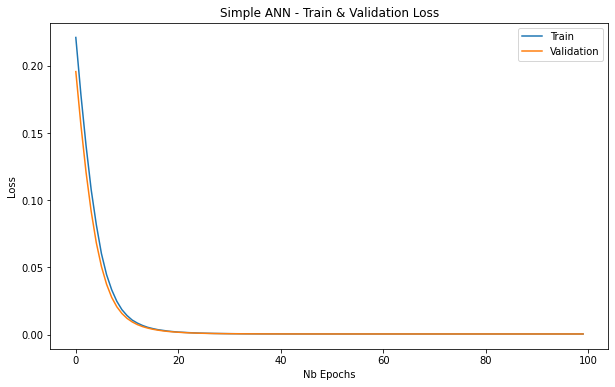

Minimum loss of 0.00044933296157978475 reached at epoch 98
Minimum validation loss of 0.0004481292562559247 reached at epoch 99


In [12]:
plot_loss(Simple_ANN_history, 'Simple ANN - Train & Validation Loss')

#Making The Predictions

The last of making model is to predict data.

In [13]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, 1))
batch

array([[[0.70556745],
        [0.9       ],
        [0.82034261],
        [0.45974304],
        [0.27044968],
        [0.18993576],
        [0.15738758],
        [0.13169165],
        [0.1       ],
        [0.10085653],
        [0.12226981],
        [0.14368308]]])

In [14]:
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

pred_list


[array([0.12158757], dtype=float32),
 array([0.12369365], dtype=float32),
 array([0.12659135], dtype=float32),
 array([0.12888867], dtype=float32),
 array([0.12971276], dtype=float32),
 array([0.12991643], dtype=float32),
 array([0.1302034], dtype=float32),
 array([0.13066691], dtype=float32),
 array([0.1306133], dtype=float32),
 array([0.13023269], dtype=float32),
 array([0.13026583], dtype=float32),
 array([0.13030085], dtype=float32)]

In [15]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-7] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

##Create Table Prediction

This table prediction will show the data prediction. Before create the table, it is neccessary to restore data from normalization to real dataset. Of couser, author give back the normalization function that is given in the assignment.

In [16]:
df_predict = pd.DataFrame(((0.8*(scaler.inverse_transform(pred_list)))+0.1),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)
df_proj

,Units,Prediction
2019-01-01,205.0,NaN
2019-02-01,196.0,NaN
2019-03-01,141.0,NaN
2019-04-01,112.0,NaN
2019-05-01,163.0,NaN
2019-06-01,242.0,NaN
2019-07-01,816.0,NaN
2019-08-01,1043.0,NaN
2019-09-01,950.0,NaN
2019-10-01,529.0,NaN


##Plot Prediction Result

No handles with labels found to put in legend.


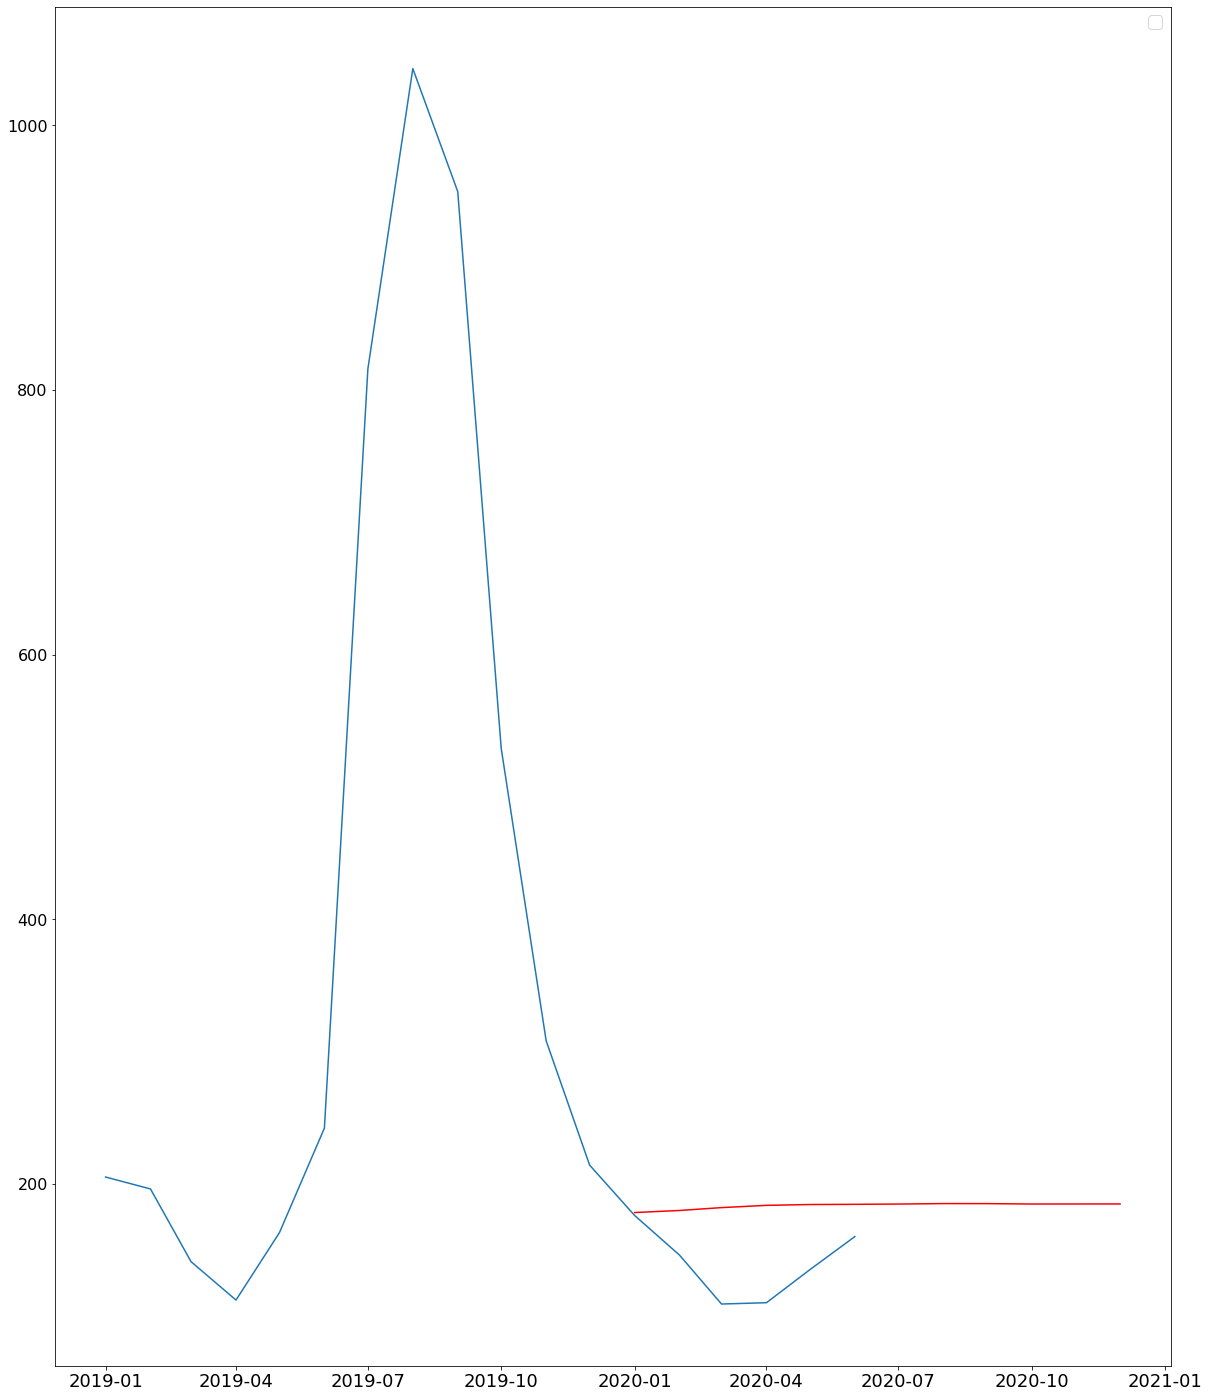

In [17]:
plt.figure(figsize=(20, 25))
plt.plot(df_proj.index, df_proj['Units'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

#Save Model
To save the model so that in the future it will use or deploy in mobile application or etc. 

In [18]:
model.save('ANN_model.h5')

This model is properly going well, but author believe that prediction result is not same pattern with real data. it might be happened when parameters and hyperparameters tuning are not going properly. Hence, to produce best model in the future it should be modifiying the parameter including learning rate, epoch, and etc.